Problem Statement:

-This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

df=pd.read_csv(r"C:\Users\Yash Bhardwaj\Downloads\archive\PS_20174392719_1491204439457_log.csv")
print("The dataset has :",df.shape[0]," number of rows.\n","The dataset has :",df.shape[1]," number of columns.")

The dataset has : 6362620  number of rows.
 The dataset has : 11  number of columns.


**DATA ANALYSIS**

In [3]:
#checking out a sample from the dataset
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#now let's check out for duplicate data that might be present in the dataset

dfdup=df[df.duplicated()]
dfdup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


- The dataset has no duplicated data, which is a good start

In [5]:
#getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


- 'type' , 'nameOrig' , 'nameDest' are categorical variables the rest are integer type

In [6]:
#further describing the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Observations:

- 'amount' , 'oldbalanceOrg' , 'newbalanceOrig' might be highly skewed as there is reasonable difference present between the values of their mean and median
- outliers might also be present for some variables as there is reasonable difference present between the third quartile and maximum value for some variables

In [7]:
#checking for null values if present in the dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

-the dataset has no null values present

**Exploratory Data Analysis**

Assumption:
- As far as we are finding the fraud customers I think to predict if a customer is fraud or not variables like step , type , flagged fraud would make sense
- I don't think nameOrig and nameDest would make much sense when predicting if a customer is fraud or not

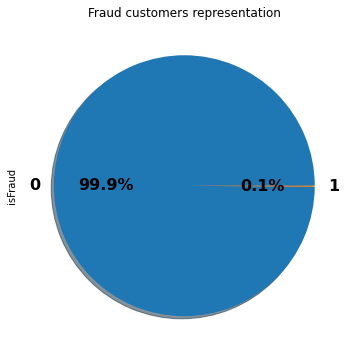

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
#plotting the target variable

plt.figure(figsize=(12,6))
df['isFraud'].value_counts().plot.pie(autopct='%2.1f%%',
                                     textprops ={'fontsize':16 ,'fontweight' :'bold'},
                                     shadow=True)
plt.title('Fraud customers representation')
plt.show()

df['isFraud'].value_counts()

Observations:
- So only 0.1% of the customers are reported to be frauds
- the dataset is highly imabalanced

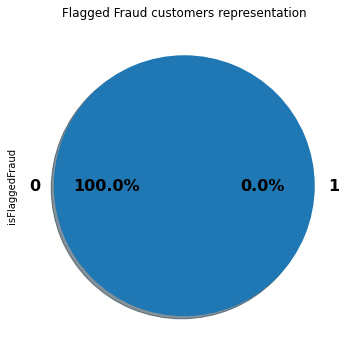

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
#plotting 'isFlaggedFraud' customers
 
plt.figure(figsize=(12,6))
df['isFlaggedFraud'].value_counts().plot.pie(autopct='%2.1f%%',
                                     textprops ={'fontsize':16 ,'fontweight' :'bold'},
                                     shadow=True)
plt.title('Flagged Fraud customers representation')
plt.show()

df['isFlaggedFraud'].value_counts()

Comment:
- Only 16 customers out of more than 60 lakh customers are reported to be flagged fraud which means that these customers have attempted to transfer more than 200.000 in a single transaction.

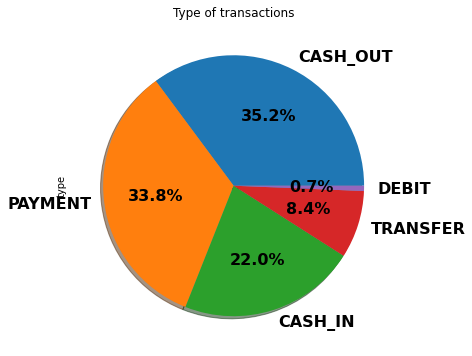

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
#checking different types of transactions
plt.figure(figsize=(12,6))
df['type'].value_counts().plot.pie(autopct='%2.1f%%',
                                     textprops ={'fontsize':16 ,'fontweight' :'bold'},
                                     shadow=True)
plt.title('Type of transactions')
plt.show()

df['type'].value_counts()

Comment:
- 35.2% customer's transaction type is cash_out
- only 0.7% customer record is for debit type transaction

In [11]:
#checking for unique value present in other categorical datatype variables
len(df['nameOrig'].unique())

6353307

In [12]:
len(df['nameDest'].unique())   #same for the name of destination customer

2722362

- Above variables have many unique values present which makes sense

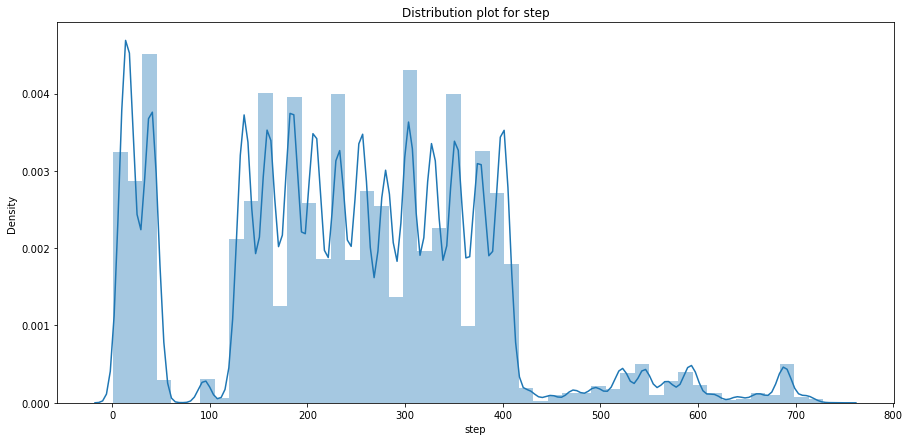

In [13]:
#plotting the distribution of 'step' variable

plt.figure(figsize=(15,7))
sns.distplot(df['step'])
plt.title("Distribution plot for step")
plt.show()

Comment:
- as it can be seen that the range of step is high
- there isn't skewness present as the blocks are close only to normal distribution curve

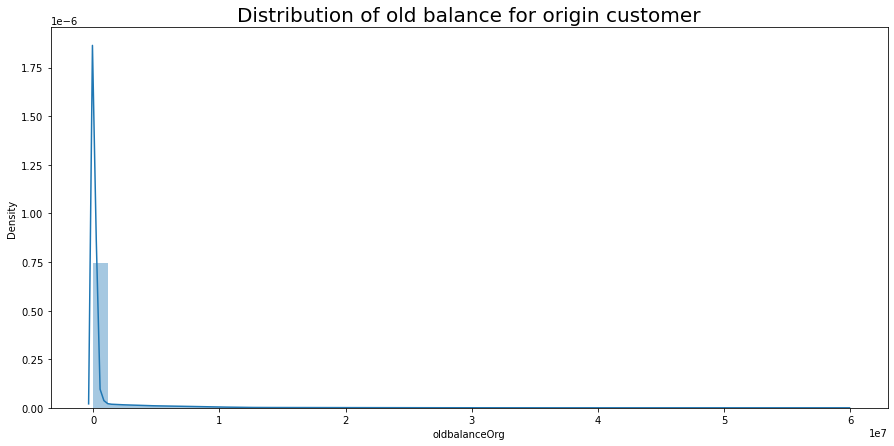

In [14]:
# visualizing the distribution of old balance for origin customer

# setting the size of the plot
plt.figure(figsize=(15,7))
sns.distplot(df['oldbalanceOrg'])
plt.title('Distribution of old balance for origin customer', fontsize = 20)
plt.show()

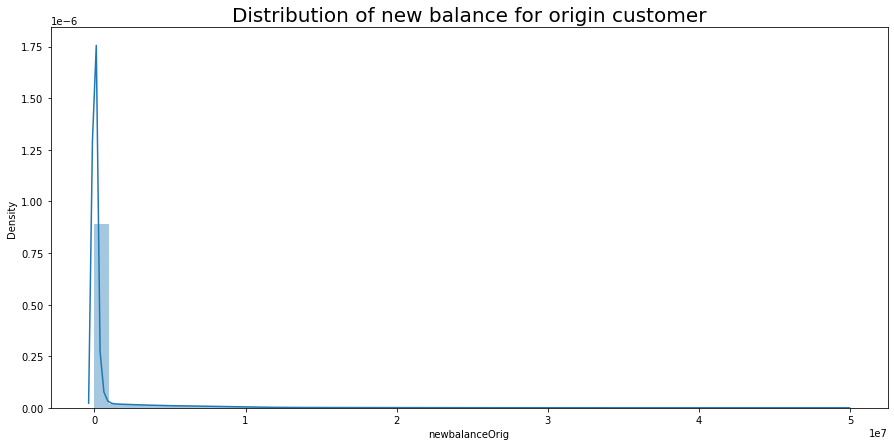

In [15]:
# visualizing the distribution of new balance for origin customer

# setting the size of the plot
plt.figure(figsize=(15,7))
sns.distplot(df['newbalanceOrig'])
plt.title('Distribution of new balance for origin customer', fontsize = 20)

plt.show()

- we can see that the data is highly skewed for these variables

In [18]:
#checking the value counts for amount
df['amount'].value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: amount, Length: 5316900, dtype: int64

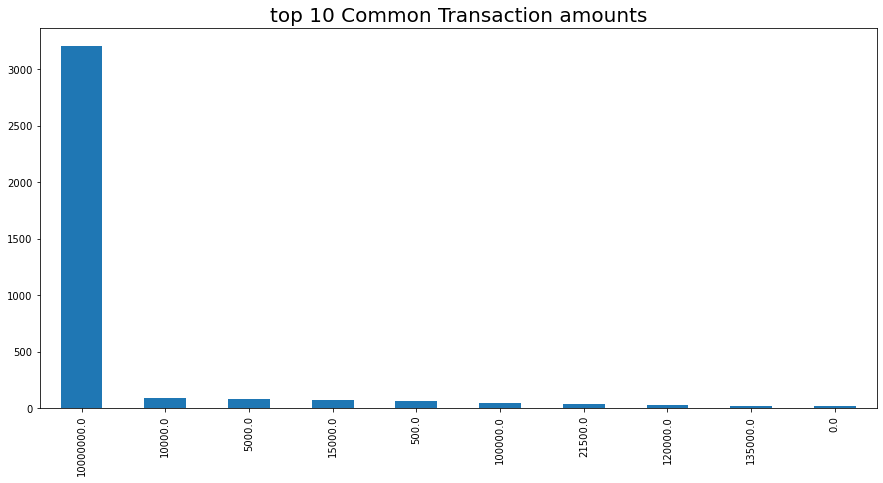

In [19]:
#plotting amount distribution
plt.figure(figsize=(15,7))
df['amount'].value_counts().head(10).plot.bar()
plt.title('top 10 Common Transaction amounts', fontsize = 20)
plt.show()

- 0 amount is also among the top 10 common transaction of amount

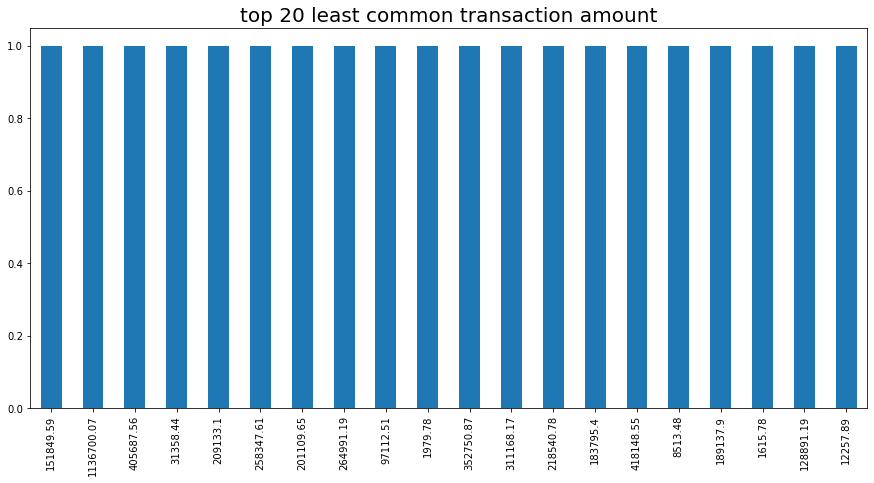

In [20]:
#plotting the le
plt.figure(figsize=(15,7))
df['amount'].value_counts().tail(20).plot.bar()
plt.title('top 20 least common transaction amount', fontsize = 20)
plt.show()

In [21]:
#checking for steps where with respect to the fraud customers

df_step_fraud = df['step'].loc[df.isFraud==1]
df_step_fraud.value_counts()

212    40
523    30
387    28
425    28
249    28
       ..
202     2
589     2
112     2
548     2
662     2
Name: step, Length: 741, dtype: int64

In [22]:
#finding the maximum, minimum and mode step with fraud label customer

print("Maximum step:",df.loc[df.isFraud == 1].step.max())
print("Minimum step:",df.loc[df.isFraud == 1].step.min())
print("Average step:",df.loc[df.isFraud ==1].step.mode())

Maximum step: 743
Minimum step: 1
Average step: 0    212
dtype: int64


- both 0 and 212 steps are the most common ones

In [23]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [24]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = ',(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = ',(len(dfFraudCashout)))

The number of fraudulent TRANSFERs =  4097
The number of fraudulent CASH_OUTs =  4116


Comment:
- from above we could see that only Transfer and cash_out type transaction are included with fraud customers

In [34]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [35]:
#finding amount of fradulent transactions
df.loc[df.isFraud == 1].amount.drop_duplicates()

2              181.00
251           2806.00
680          20128.00
724         416001.33
969        1277212.77
              ...    
6362610      63416.99
6362612    1258818.82
6362614     339682.13
6362616    6311409.28
6362618     850002.52
Name: amount, Length: 3977, dtype: float64

In [36]:
# finding out the minimum and maximum transaction of amount when it is set to be Fraud

print("Amount Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1)].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1)].amount.max())

Amount Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


- 1 million is the highest amount with fraud labelled customer

In [38]:
#finding out where oldbalance and new balance origin are zero with fraud customers

zerobalance_df = df.loc[(df.isFraud == 1) & (df.oldbalanceOrg == 0) & (df.newbalanceOrig == 0)]
zerobalance_df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,C749981943,0.0,0.0,C667346055,102.00,9291619.62,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.0,0.0,C789014007,11397.00,184477.77,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.0,0.0,C277510102,0.00,970749.68,1,0
77745,10,CASH_OUT,277970.88,C489647033,0.0,0.0,C571514738,0.00,277970.88,1,0
138559,11,TRANSFER,1933920.80,C1706582969,0.0,0.0,C461905695,1283762.85,3217683.65,1,0
169998,12,CASH_OUT,149668.66,C227115333,0.0,0.0,C460735540,44170.11,193838.76,1,0
178668,12,CASH_OUT,222048.71,C265790428,0.0,0.0,C1700442291,2979.00,225027.71,1,0
200845,13,CASH_OUT,454859.39,C1274887619,0.0,0.0,C2146670328,0.00,454859.39,1,0
291459,15,CASH_OUT,95428.32,C947728507,0.0,0.0,C1720721903,0.00,95428.32,1,0
296686,15,CASH_OUT,39713.28,C1404885898,0.0,0.0,C1795377601,1274866.51,1314579.79,1,0


In [53]:
#finding out the maximum and minimum old/new balance for origin with fraud label customers
print("Old balance at Origin")
print("Maximum Old Balance:",df.loc[df.isFraud == 1].oldbalanceOrg.max())
print("Minimum Old Balance:",df.loc[df.isFraud == 1].oldbalanceOrg.min())

print("\n\nNew balance at Origin")
print("Maximum New Balance:",df.loc[df.isFraud == 1].newbalanceOrig.max())
print("Minimum New Balance:",df.loc[df.isFraud == 1].newbalanceOrig.min())

Old balance at Origin
Maximum Old Balance: 59585040.37
Minimum Old Balance: 0.0


New balance at Origin
Maximum New Balance: 49585040.37
Minimum New Balance: 0.0


In [40]:
#finding out where oldbalance and new balance destination are zero with fraud customers

zerobalanceD_df = df.loc[(df.isFraud == 1) & (df.oldbalanceDest == 0) & (df.newbalanceDest == 0)]
zerobalanceD_df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.0,0.0,1,0
1869,1,TRANSFER,25071.46,C669700766,25071.46,0.00,C1384210339,0.0,0.0,1,0
2301,1,TRANSFER,235238.66,C1872047468,235238.66,0.00,C116289363,0.0,0.0,1,0
3059,2,TRANSFER,1096187.24,C1093223281,1096187.24,0.00,C2063275841,0.0,0.0,1,0
3162,2,TRANSFER,963532.14,C1440057381,963532.14,0.00,C268086000,0.0,0.0,1,0
3271,2,TRANSFER,14949.84,C140702728,14949.84,0.00,C634210724,0.0,0.0,1,0


In [54]:
#finding out the maximum and minimum old/new balance for destination with fraud label customers
print("Old balance at Destination")
print("Maximum Old Balance:",df.loc[df.isFraud == 1].oldbalanceDest.max())
print("Minimum Old Balance:",df.loc[df.isFraud == 1].oldbalanceDest.min())

print("\n\nNew balance at Destination")
print("Maximum New Balance:",df.loc[df.isFraud == 1].newbalanceDest.max())
print("Minimum New Balance:",df.loc[df.isFraud == 1].newbalanceDest.min())

Old balance at Destination
Maximum Old Balance: 236230516.82
Minimum Old Balance: 0.0


New balance at Destination
Maximum New Balance: 236726494.66
Minimum New Balance: 0.0


In [42]:
#finding out where all four balances are zero with fraud label

zerobalanceC_df = df.loc[(df.isFraud == 1) & (df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.oldbalanceOrg == 0) & (df.newbalanceOrig == 0)]
zerobalanceC_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.0,0.0,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.0,0.0,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.0,0.0,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.0,0.0,1,0
6281485,646,CASH_OUT,0.0,C1997645312,0.0,0.0,C601248796,0.0,0.0,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.0,0.0,C1156763710,0.0,0.0,1,0


In [48]:
#finding out fraud flagged customers when fraud is also labelled on the customer

flagged_df = df.loc[(df.isFlaggedFraud == 1) & (df.isFraud == 1)]
flagged_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [49]:
#finding out the transaction type with flagged fraud person

df.loc[df.isFlaggedFraud == 1].type.unique()

array(['TRANSFER'], dtype=object)

- Only transfer type transaction has flagged fraud customer

In [55]:
flagged_df_transc = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
flagged_df_transc

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [57]:
#maximum and minimum amount with flagged fraud customers
print("Maximum Amount:",df.loc[df.isFlaggedFraud == 1].amount.max())
print("Minimum Amount:",df.loc[df.isFlaggedFraud == 1].amount.min())

Maximum Amount: 10000000.0
Minimum Amount: 353874.22


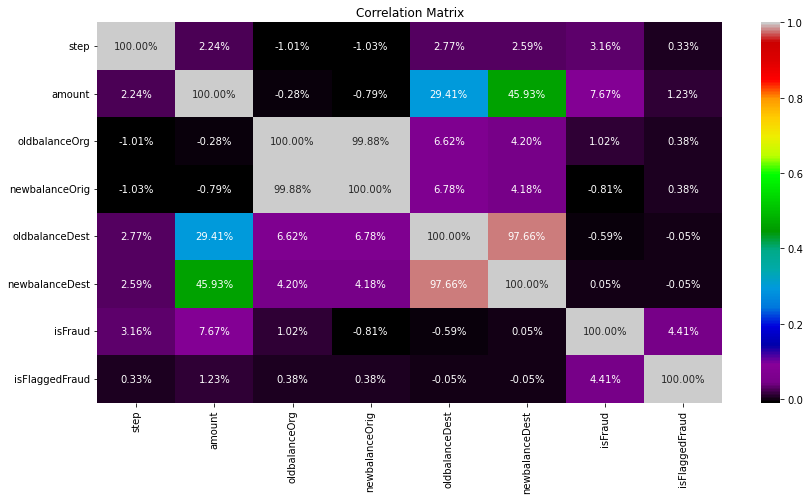

In [64]:
#correlation matrix

plt.figure(figsize=(14,7))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), cmap='nipy_spectral', annot=True, fmt='.2%')
plt.show()

Observation:
- all of the input variable has very weak correlation with the target variable
- oldbalanceDest and newbalanceDest are highly correlated with each other, hence multicollinearity is present

In [65]:
#correlation with target variable
df.corr()['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

- amount has an correlation bond of 0.07  with target variable isFraud, where 0 being the weakest correlation and 1 being the strongest correlation

In [82]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [86]:
#let's now check for the outliers using Zscore

from scipy.stats import zscore     #importing zscore 

z=np.abs(zscore(df.drop(['type' , 'nameOrig' , 'nameDest'],axis=1)))   #numerical columns only

#threhold=3
np.where(z>3)

(array([      2,       3,      84, ..., 6362618, 6362619, 6362619],
       dtype=int64),
 array([6, 6, 5, ..., 6, 0, 6], dtype=int64))

In [89]:
#let's check the value of a loaction

z.iloc[2,6]

27.81548280450792

In [90]:
z.iloc[6362619,6]

27.81548280450792

- the zscore value outside range -3 to +3 is considered as an outlier

In [91]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [92]:
print("Data loss is",(df.shape[0] - df_new.shape[0])/df.shape[0]*100,'%')

Data loss is 5.383348369068088 %


- Data loss is around 5% of the total data when outliers are being removed, but since this data is real every point can be of some use in building the model, So, I am not going to remove the outliers

**SPLITTING THE DATA**

- Since the fraud label transaction type is only Transfer and Cash-Out, I am going to drop the data with other type class

In [3]:
df_model = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

x = df_model.drop(['isFraud', 'nameOrig' , 'nameDest'] , axis=1)
y = df_model['isFraud']

print("Shape of X:",x.shape)
print("Shape of Y:",y.shape)

Shape of X: (2770409, 8)
Shape of Y: (2770409,)


In [4]:
#encoding the categorical variable

x['type'].replace('TRANSFER',0,inplace=True)
x['type'].replace('CASH_OUT',1,inplace=True)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [5]:
#Now checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():        #defining a function which returns VIF value for features
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [6]:
#calling the function
vif_calc()

   VIF Factor        features
0    2.729546            step
1    2.556226            type
2    5.188397          amount
3    2.795435   oldbalanceOrg
4    2.662569  newbalanceOrig
5   65.276755  oldbalanceDest
6   80.858351  newbalanceDest
7    1.017702  isFlaggedFraud


- we have already seen the strong correlation between oldbalanceDest and newbalanceDest , VIF upto 10-15 is still passable depending on the case though, but since the VIF for these two is so high I am going to drop the least correlated variable of these two

In [7]:
#dropping newbalanceDest from the features

x.drop('newbalanceDest' , axis=1, inplace=True)

#again checking for VIF

vif_calc()

   VIF Factor        features
0    2.721522            step
1    2.549861            type
2    1.309940          amount
3    2.729427   oldbalanceOrg
4    2.646129  newbalanceOrig
5    1.282491  oldbalanceDest
6    1.017263  isFlaggedFraud


- The multicollinearity has been reduced from the dataset

In [9]:
#splitting the data into training and testing

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state = 0 , stratify = y)

print("X TRAIN SIZE:",x_train.shape)
print("Y TRAIN SIZE:",y_train.shape)

print("\nX TEST SIZE:",x_test.shape)
print("Y TEST SIZE:",y_test.shape)

X TRAIN SIZE: (1856174, 7)
Y TRAIN SIZE: (1856174,)

X TEST SIZE: (914235, 7)
Y TEST SIZE: (914235,)


- Since the dataset is highly imbalanced, I am going to use SMOTE for over sampling the minority class for training data only and not the test set as this can allow model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [10]:
#checking for value counts
y_train.value_counts()

0    1850671
1       5503
Name: isFraud, dtype: int64

In [11]:
#applying SMOTE over sampling to deal with the imbalanced dataset 

from imblearn.over_sampling import SMOTE

smt = SMOTE()

train_x , train_y = smt.fit_resample(x_train , y_train)

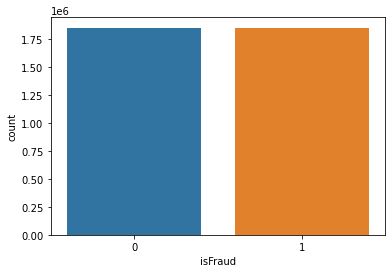

In [176]:
#now checking the value counts

sns.countplot(train_y)
plt.show()

- The imabalanced data has been dealt with

**BUILDING MODELS**

In [12]:
#Importing Machine learning Model and metrics library 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc

1. Logistic Regression

In [13]:
lr = LogisticRegression()
lr.fit(train_x , train_y)
predlr = lr.predict(x_test)

In [14]:
acc_lr = round(accuracy_score(y_test , predlr)*100,2)

print("Accuracy score for Logistic Regression Model:",acc_lr)
print("\n Confusion Matrix for Logistic Regression:\n",confusion_matrix(y_test , predlr))
print("\nClassification report for Logistic Regression:\n",classification_report(y_test , predlr))

Accuracy score for Logistic Regression Model: 88.14

 Confusion Matrix for Logistic Regression:
 [[803158 108367]
 [    68   2642]]

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94    911525
           1       0.02      0.97      0.05      2710

    accuracy                           0.88    914235
   macro avg       0.51      0.93      0.49    914235
weighted avg       1.00      0.88      0.93    914235



In [15]:
#cross validation for logistic regression

score_lr = cross_val_score(lr,x,y,cv=5)

In [16]:
print("Scores:",score_lr,'\n')
print("Mean:",score_lr.mean(),'\n')
print("Standard deviation:",score_lr.std())

Scores: [0.97562816 0.99813566 0.99802376 0.99765739 0.99761768] 

Mean: 0.9934125265277258 

Standard deviation: 0.008894462951945407


2. Decision Tree Classifier

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x , train_y)
preddtc = dtc.predict(x_test)

In [18]:
acc_dtc = round(accuracy_score(y_test , preddtc)*100,2)

print("Accuracy score for Decision Tree Classifier Model:",acc_dtc)
print("\n Confusion Matrix for Decision Tree Classifier:\n",confusion_matrix(y_test , preddtc))
print("\nClassification report for Decision Tree Classifier:\n",classification_report(y_test , preddtc))

Accuracy score for Decision Tree Classifier Model: 99.86

 Confusion Matrix for Decision Tree Classifier:
 [[910441   1084]
 [   200   2510]]

Classification report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    911525
           1       0.70      0.93      0.80      2710

    accuracy                           1.00    914235
   macro avg       0.85      0.96      0.90    914235
weighted avg       1.00      1.00      1.00    914235



In [19]:
#cross validation for decision tree classifier

score_dtc = cross_val_score(dtc,x,y,cv=5)

In [20]:
print("Scores:",score_dtc,'\n')
print("Mean:",score_dtc.mean(),'\n')
print("Standard deviation:",score_dtc.std())

Scores: [0.99857061 0.98002281 0.83220173 0.99888825 0.01052554] 

Mean: 0.76404178822829 

Standard deviation: 0.3818997121248896


3. KNeighbors Classifier

In [21]:
knn = KNeighborsClassifier()
knn.fit(train_x , train_y)
predknn = knn.predict(x_test)

In [22]:
acc_knn = round(accuracy_score(y_test , predknn)*100,2)

print("Accuracy score for KNeighbors Classifier Model:",acc_knn)
print("\n Confusion Matrix for KNeighbors:\n",confusion_matrix(y_test , predknn))
print("\nClassification report for KNeighbors Classifier:\n",classification_report(y_test , predknn))

Accuracy score for KNeighbors Classifier Model: 99.17

 Confusion Matrix for KNeighbors:
 [[904152   7373]
 [   222   2488]]

Classification report for KNeighbors Classifier:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    911525
           1       0.25      0.92      0.40      2710

    accuracy                           0.99    914235
   macro avg       0.63      0.95      0.70    914235
weighted avg       1.00      0.99      0.99    914235



In [23]:
#cross validation for KNeighbors classifier

score_knn = cross_val_score(knn,x,y,cv=5)

In [24]:
print("Scores:",score_knn,'\n')
print("Mean:",score_knn.mean(),'\n')
print("Standard deviation:",score_knn.std())

Scores: [0.99854895 0.99886479 0.99892074 0.9988702  0.9988684 ] 

Mean: 0.9988146154787184 

Standard deviation: 0.00013441661276881453


4. XGB Classifier 

In [25]:
from xgboost.sklearn import XGBClassifier

In [26]:
xgb = XGBClassifier()
xgb.fit(train_x , train_y)
predxgb = xgb.predict(x_test)

In [27]:
acc_xgb = round(accuracy_score(y_test , predxgb)*100,2)

print("Accuracy score for XGB Classifier Model:",acc_xgb)
print("\n Confusion Matrix for XGB Classifier:\n",confusion_matrix(y_test , predxgb))
print("\nClassification report for XGB Classifier:\n",classification_report(y_test , predxgb))

Accuracy score for XGB Classifier Model: 99.73

 Confusion Matrix for XGB Classifier:
 [[909055   2470]
 [    27   2683]]

Classification report for XGB Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    911525
           1       0.52      0.99      0.68      2710

    accuracy                           1.00    914235
   macro avg       0.76      0.99      0.84    914235
weighted avg       1.00      1.00      1.00    914235



In [28]:
#cross validation for XGB classifier

score_xgb = cross_val_score(xgb,x,y,cv=3)

In [29]:
print("Scores:",score_xgb,'\n')
print("Mean:",score_xgb.mean(),'\n')
print("Standard deviation:",score_xgb.std())

Scores: [0.99704376 0.98992387 0.92862024] 

Mean: 0.9718626227237973 

Standard deviation: 0.03071483080952003


Remarks:
- As we can see XGB Classifier is the best working model upto now
- It has a great accuracy score and better recall and precision for the minority class when comapred to algorithms
- The cross validation score for XGB Classifier is around 97% with a deivation of -/+ 3% in this case
- As the cross validation score is very close to the accuracy score we are going to select this as our best model as the model is working extremenly good

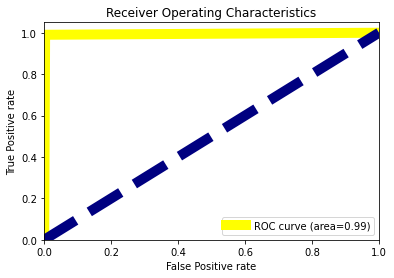

In [30]:
#roc auc plotting for XGB Classifier

fpr,tpr,thresholds=roc_curve(y_test,predxgb)

roc_auc=auc(fpr,tpr)         #area under curve score

plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

- We can see that the XGB model is working so much better than the base model
- The more the area under the curve the better the model

**Tuning/Optimizing**

In [39]:
#checking for feature importances

importances = pd.DataFrame({'feature':x.columns,'importance':np.round(xgb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
newbalanceOrig,0.381
oldbalanceOrg,0.321
type,0.141
amount,0.125
step,0.016
oldbalanceDest,0.013
isFlaggedFraud,0.002


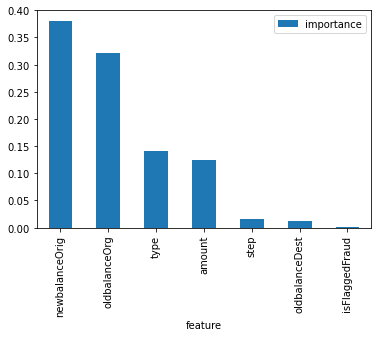

In [41]:
importances.plot.bar() #plotting a barplot
plt.show()

#Remarks:
- For XGB Classifier the most important feature is coming out to be new balance at origin
- The least important feature is coming out to be isFlaggedFraud variable
- Let's try and drop least important feature and check the accuracy

In [43]:
x_train_modify = train_x.drop('isFlaggedFraud',axis=1)     #dropping the variable from both the sets
x_test_modify = x_test.drop('isFlaggedFraud',axis=1)

In [44]:
#now re-training the model and checking for predictions

xgb = XGBClassifier()
xgb.fit(x_train_modify , train_y)
predxgb_modify = xgb.predict(x_test_modify)

In [45]:
acc_xgb_modify = round(accuracy_score(y_test , predxgb_modify)*100,2)

print("Accuracy Before:",acc_xgb)
print("\n Accuracy After:",acc_xgb_modify)

Accuracy Before: 99.73

 Accuracy After: 99.74


Remark:
- we can see the accuracy score has improved after removing least important variable

Hyperparameter Tuning:

In [32]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV              #importing HalvingRandomSearch

Remark:
- Using Halving Search CV as it is faster than Grid Search CV

In [37]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],                    #making the parameter grid
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 0.9]
}

hrs = HalvingRandomSearchCV(xgb, params,cv = 3)
hrs.fit(train_x, train_y)

HalvingRandomSearchCV(cv=3,
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=2...
          

In [38]:
print("Best score:",hrs.best_score_)       #checking for best score
print("Best parameters:\n",hrs.best_params_)   #checking for best parameters

Best score: 0.983529539171094
Best parameters:
 {'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'learning_rate': 0.05, 'base_score': 0.2}


In [47]:
#now re-training the model and checking for predictions

xgb = XGBClassifier(reg_lambda = 0.5,
                    reg_alpha = 0.5,
                    learning_rate = 0.05,
                    base_score = 0.2)
xgb.fit(x_train_modify , train_y)

predxgb_tuned = xgb.predict(x_test_modify)

In [48]:
acc_xgb_tuned = round(accuracy_score(y_test , predxgb_tuned)*100,2)

print("Accuracy score for XGB Classifier Model after tuned parameters:",acc_xgb_tuned)
print("\n Confusion Matrix for XGB Classifier:\n",confusion_matrix(y_test , predxgb_tuned))
print("\nClassification report for XGB Classifier:\n",classification_report(y_test , predxgb_tuned))

Accuracy score for XGB Classifier Model after tuned parameters: 98.61

 Confusion Matrix for XGB Classifier:
 [[898845  12680]
 [    17   2693]]

Classification report for XGB Classifier:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    911525
           1       0.18      0.99      0.30      2710

    accuracy                           0.99    914235
   macro avg       0.59      0.99      0.65    914235
weighted avg       1.00      0.99      0.99    914235



Remarks:
- The accuracy score now is much closer to the cross validation score
- The model is working well

In [53]:
#making a data frame

preddf = pd.DataFrame({'Actual':y_test , 'Predicted':predxgb_tuned})
preddf = preddf.loc[(preddf.Predicted == 1)]
preddf

,Actual,Predicted
5602103,0,1
1030651,1,1
4774124,0,1
1992897,0,1
3705795,0,1
...,...,...
6123616,0,1
1114125,0,1
774248,0,1
5359453,0,1


In [54]:
#saving the model

import pickle
pickle.dump(xgb,open('fraud_detection.pkl','wb'))